In [1]:
%matplotlib inline
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from importlib import reload

In [2]:
import os
import deepdish

/home/users/manyu/anaconda3/envs/modisco/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [37]:
scores_path = '/oak/stanford/groups/akundaje/manyu/train_all_models/DapSeq_Aradopsis/train_models/trained_models/REM16_model_spec_seq_reverse_comp_pool25_dropout_0.2_fc100/pos_scores.h5'
assert(os.path.exists(scores_path))
scores = deepdish.io.load(scores_path)


In [38]:
!cat /oak/stanford/groups/akundaje/manyu/train_all_models/DapSeq_Aradopsis/train_models/trained_models/REM16_model_spec_seq_reverse_comp_pool25_dropout_0.2_fc100/pos_intervals.bed|cut -f 1|wc -l

898


In [39]:
grad_scores_seq = []
input_grad_scores_seq = []
one_hot_seqs = [] 
for i in scores['grad']['seq']:
    grad_scores_seq.append(i[:,400:600].transpose())
for i in scores['input_grad']['seq']:
    input_grad_scores_seq.append(i[:,400:600].transpose())
for i in scores['raw']['seq']:
    one_hot_seqs.append(i[:,400:600].transpose())
        

In [40]:
tasks = ['task0']
task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

In [41]:
onehot_data = one_hot_seqs
task_to_scores['task0']  = input_grad_scores_seq
task_to_hyp_scores['task0']  = grad_scores_seq

In [42]:
len(one_hot_seqs)

898

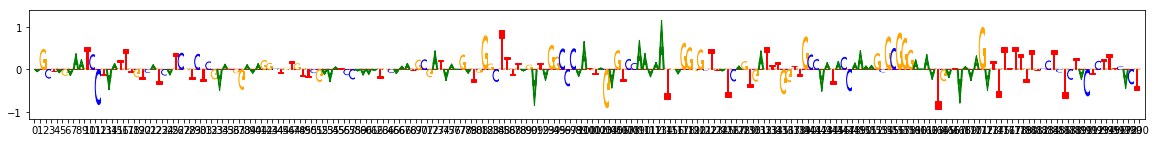

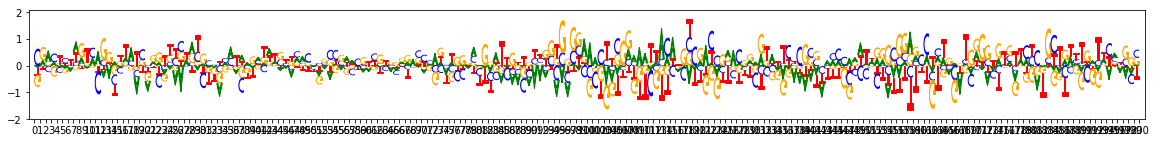

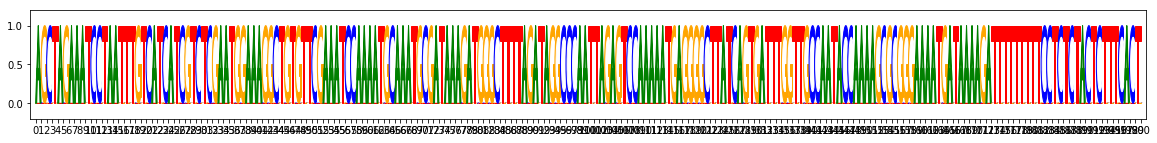

In [31]:
import modisco.visualization
from modisco.visualization import viz_sequence

viz_sequence.plot_weights(task_to_scores['task0'][1])
viz_sequence.plot_weights(task_to_hyp_scores['task0'][1])
viz_sequence.plot_weights(onehot_data[1])

In [32]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.theano_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

<module 'modisco.metaclusterers' from '/oak/stanford/groups/akundaje/manyu/softwares/tfmodisco/modisco/metaclusterers.py'>

On task task0
Computing windowed sums
Computing threshold
peak(mu)= 0.20360353589057922
Mu: 2.036035e-01 +/- 4.522502e-06
Lablace_b: 0.5652918554031675 and 0.5171030874575052
Thresholds: -3.7373449504375458 and 2.890198737382889
#fdrs pass: 0 and 129
CDFs: 0.9990617825977088 and 0.9944584062549996
Est. FDRs: 1.0 and 0.8477972760926932


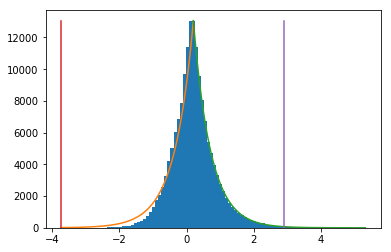

Got 76 coords
After resolving overlaps, got 76 seqlets
Across all tasks, the weakest laplace threshold used was: 0.9944584062549996
76 identified in total


ValueError: max() arg is an empty sequence

In [43]:
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    #Slight modifications from the default settings
                    sliding_window_size=20,
                    flank_size=5,
                    target_seqlet_fdr=0.85,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=20,
                        initial_flank_to_add=5,
                        kmer_len=8, num_gaps=1,
                        num_mismatches=0,
                        final_min_cluster_size=20)
                )(
                task_names=["task0"],
                contrib_scores=task_to_scores,
                hypothetical_contribs=task_to_hyp_scores,
                one_hot=onehot_data)


In [43]:
import h5py
import modisco.util
reload(modisco.util)
#!rm results.hdf5
path = "ZML1_fdr60.hdf5"
if os.path.exists(path):
    os.remove(path)
grp = h5py.File(path)
tfmodisco_results.save_hdf5(grp)

In [44]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File(path,"r")

Metaclusters heatmap


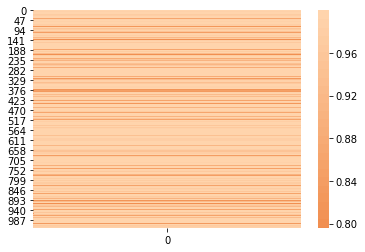

In [45]:
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()


In [46]:
metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]
print(metacluster_names)

['metacluster_0']


metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 140
Task 0 hypothetical scores:


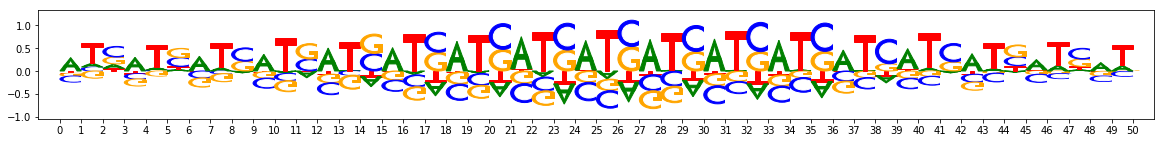

Task 0 actual importance scores:


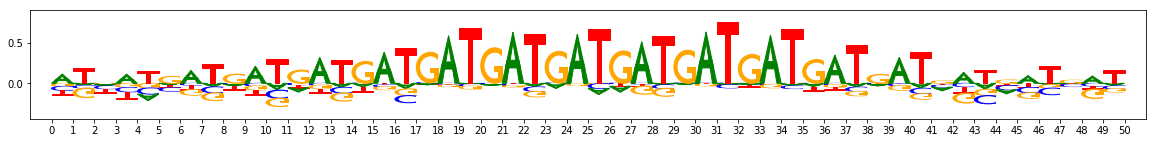

onehot, fwd and rev:


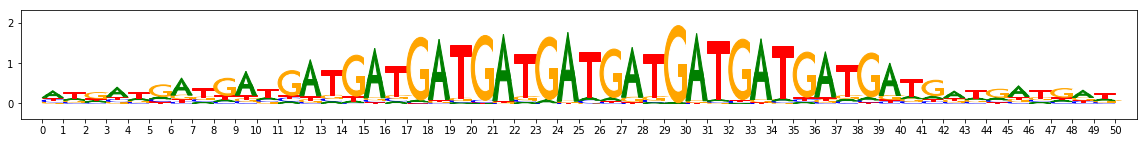

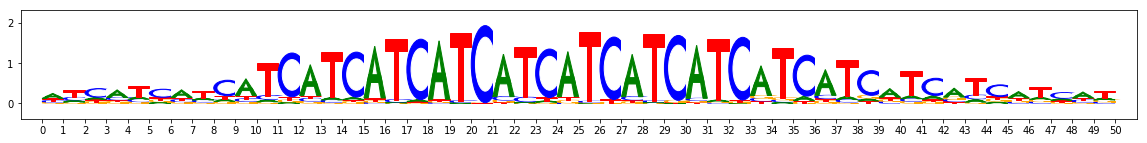

metacluster_0 pattern_1
total seqlets: 67
Task 0 hypothetical scores:


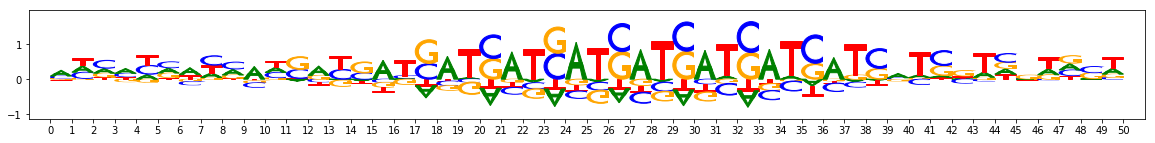

Task 0 actual importance scores:


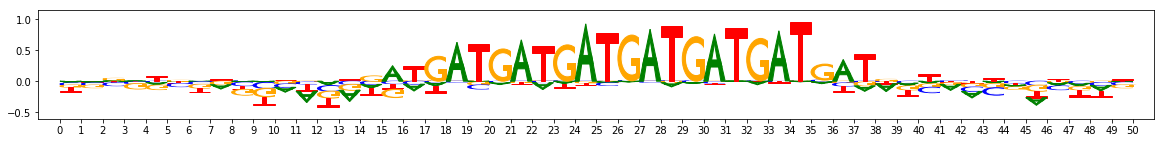

onehot, fwd and rev:


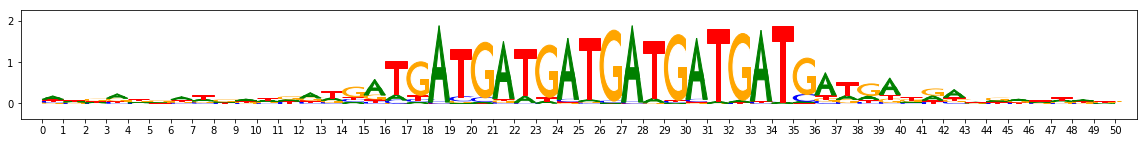

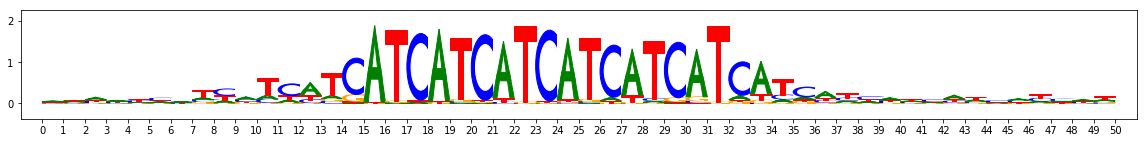

metacluster_0 pattern_2
total seqlets: 55
Task 0 hypothetical scores:


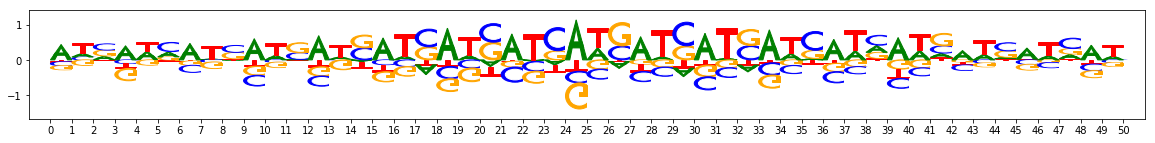

Task 0 actual importance scores:


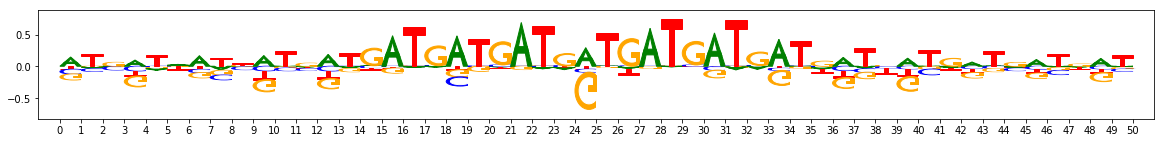

onehot, fwd and rev:


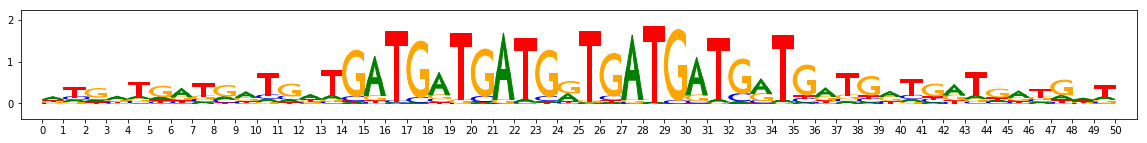

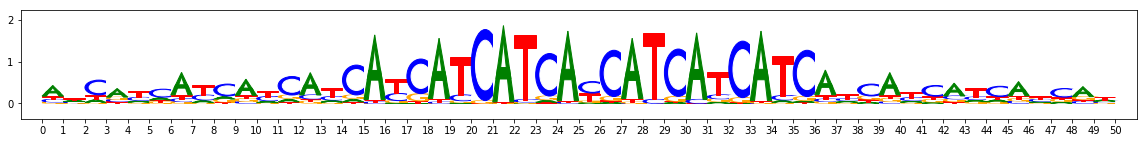

metacluster_0 pattern_3
total seqlets: 36
Task 0 hypothetical scores:


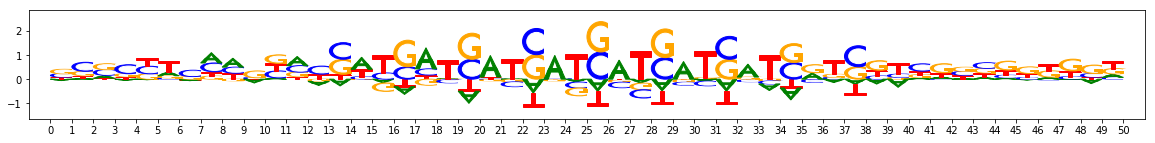

Task 0 actual importance scores:


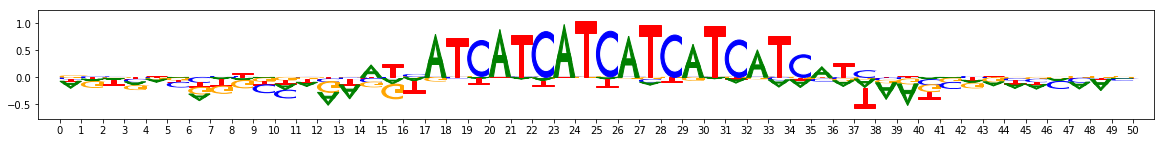

onehot, fwd and rev:


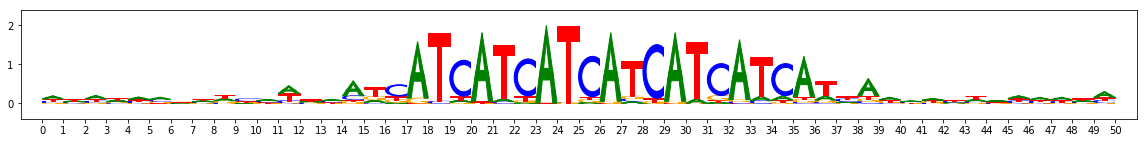

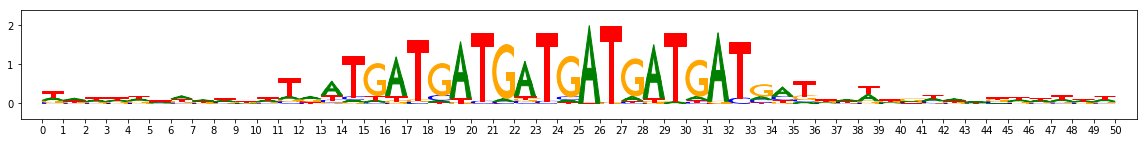

metacluster_0 pattern_4
total seqlets: 33
Task 0 hypothetical scores:


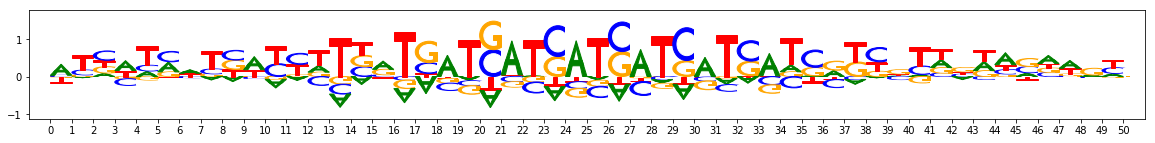

Task 0 actual importance scores:


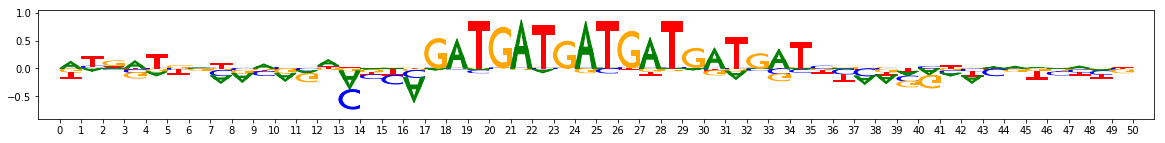

onehot, fwd and rev:


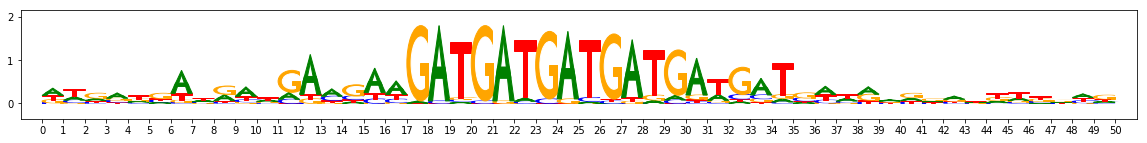

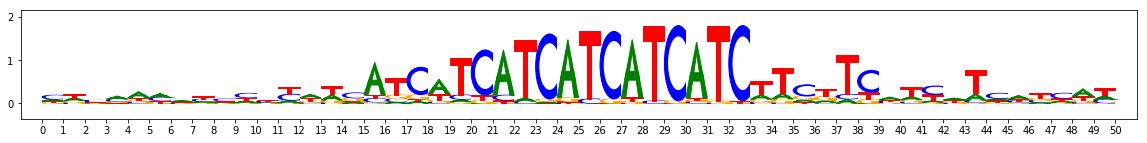

metacluster_0 pattern_5
total seqlets: 34
Task 0 hypothetical scores:


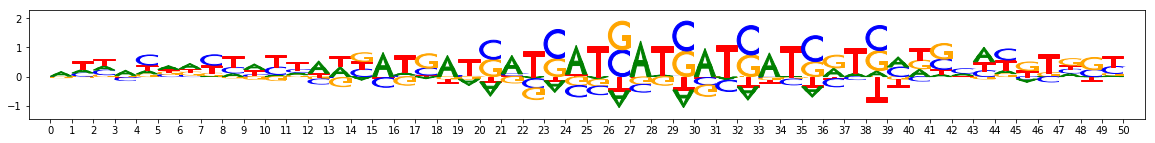

Task 0 actual importance scores:


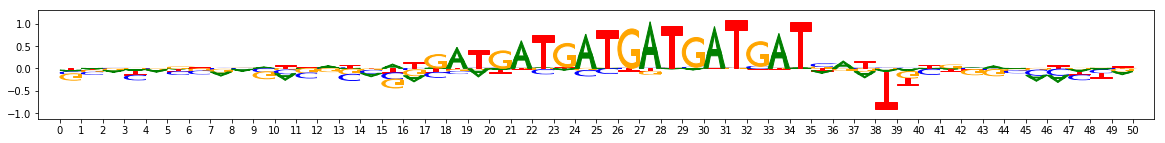

onehot, fwd and rev:


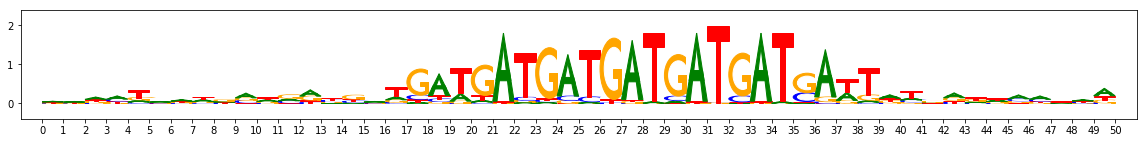

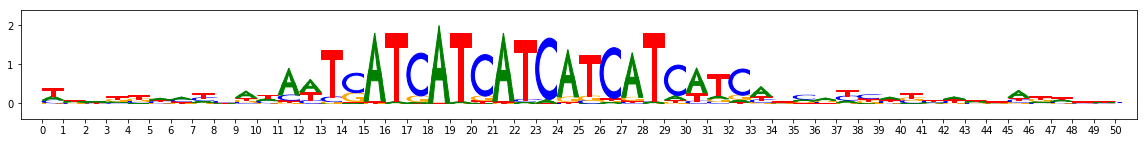

metacluster_0 pattern_6
total seqlets: 34
Task 0 hypothetical scores:


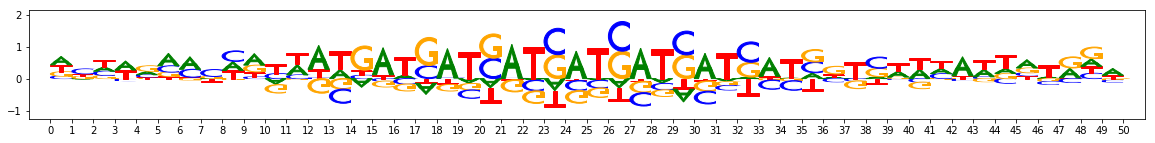

Task 0 actual importance scores:


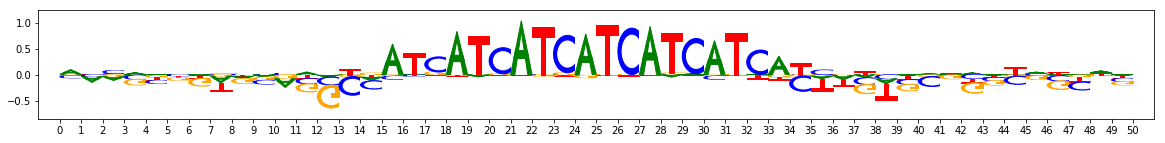

onehot, fwd and rev:


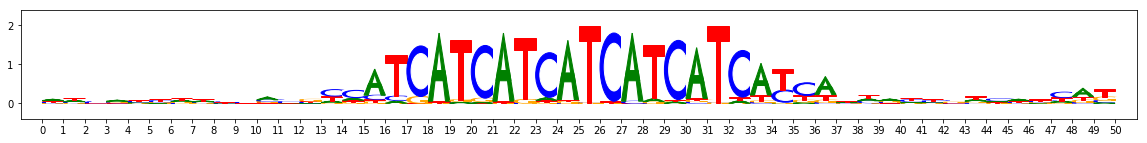

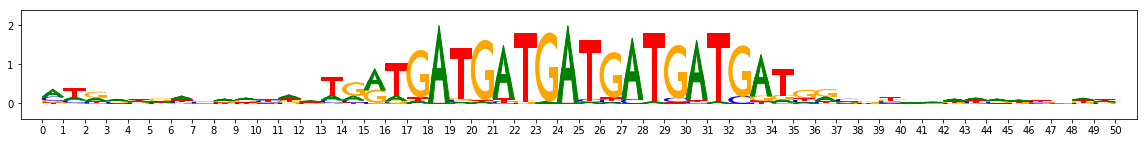

metacluster_0 pattern_7
total seqlets: 32
Task 0 hypothetical scores:


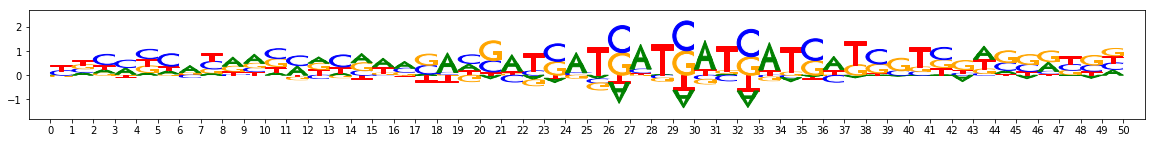

Task 0 actual importance scores:


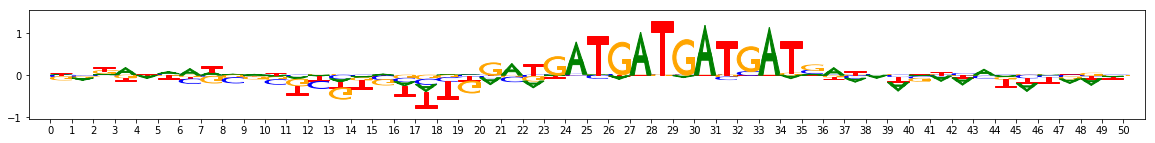

onehot, fwd and rev:


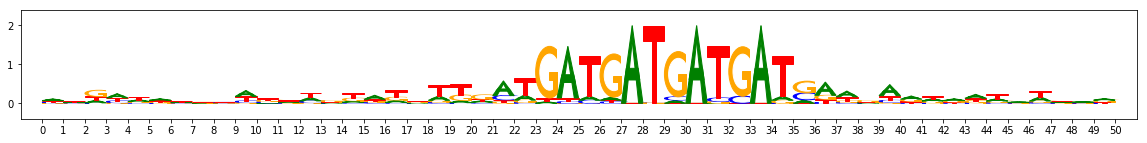

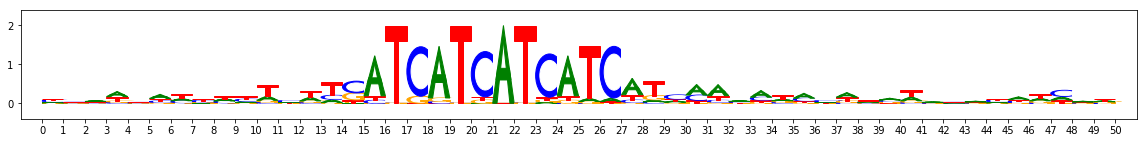

In [47]:
all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        #np.save('./grad_motif_cluster.npy',arr=pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 


In [59]:
!ls

CEBPB_modisco_old_weights_seq_channel	   onehotseq_motif_forwardIC.pdf
CEBPB_modisco_old_weights_seq_channel_new  onehotseq_motif_revIC.pdf
grad_motif.pdf				   results2_NRF1.hdf5
importance_scores.ipynb			   results3_NRF1.hdf5
importance_scores_NRF_H1.pkl		   results.hdf5
input_grad_motif.pdf			   results_new_NRF1.hdf5
mafk_modisco				   results_NRF1.hdf5
mafk_modisco_trial			   results_test1_NRF1.hdf5
modisco_script.sh			   results_test_NRF1.hdf5
new_resNRF1.hdf5			   test_modisco_workflow.ipynb
NRF1_pos_intervals_chr8.bed		   test_scores_NRF1.pkl
NRF1_scores.bed				   tmp


In [110]:
9748*120*966*1/1e9

1.12998816